# (1) HVFH Dataset Cleaning
Our overall plan in the data team, is to divide up NYC into taxi zones and then from there, predict the busyness of each zone based on known factors. Therefore, the hvfh trip data will play a pivotal part in our investigations. 

## Combining the Datasets 
Datasets outlining trip information from hvfh cab rides were sourced from TLC NYC. These trips took place from Decemeber 31st 2023 to January 1st 2022. 
Files were sourced in parquet form and must be read into pandas in order to be cleaned and analysed.

In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from IPython.display import display

C:\Users\natha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\natha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Will Use Single File as an Example

As the individual files are so large (500,000 KB each) I will have to load them in and process them all in one cell before joining them together. I will outline the steps below I used to reduce the size of the files while maintaining the integrity of all the data within them. 

In [15]:
# Initialize an empty list to collect dataframes
data_frames = []

# Iterate over the years and months in our range
for year in range(2023, 2024):
    for month in range(1, 2):
        # Making sure the month is two digit form
        month_str = str(month).zfill(2)
        
        # File names and directory
        hvfh_file_name = f'fhvhv_tripdata_{year}-{month_str}.parquet'
        
        # Try to read yellow tripdata files
        try:
            raw_partition = pq.read_table(hvfh_file_name).to_pandas()
            raw_partition = raw_yellow_partition[["hvfhs_license_num", "dispatching_base_num","pickup_datetime","dropoff_datetime","PULocationID", "DOLocationID","originating_base_num", "request_datetime","on_scene_datetime", "trip_miles", "trip_time", "base_passenger_fare","tolls","bcf","sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "shared_request_flag","shared_match_flag"]]
            data_frames.append(raw_partition)
            print(f"Successfully read file: {hvfh_file_name}")
        except Exception as e:
            print(f"Could not read file: {hvfh_file_name}. Error: {e}")

# Concatenate all dataframes in the list
if data_frames:
    combined_raw = pd.concat(data_frames, axis=0, ignore_index=True)
    print(f"Combined DataFrame shape: {combined_raw.shape}")
else:
    print("No data frames were successfully read.")
    


# Shape of the combined dataframe
combined_raw.shape

Could not read file: fhvhv_tripdata_2022-01.parquet. Error: fhvhv_tripdata_2022-01.parquet
Successfully read file: fhvhv_tripdata_2023-01.parquet
Combined DataFrame shape: (18479031, 21)


(18479031, 21)

In [16]:
combined_raw.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,originating_base_num,request_datetime,on_scene_datetime,trip_miles,...,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag
0,HV0003,B03404,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,B03404,2023-01-01 00:18:06,2023-01-01 00:19:24,0.94,...,25.95,0.0,0.78,2.30,2.75,0.0,5.22,27.83,N,N
1,HV0003,B03404,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,B03404,2023-01-01 00:48:42,2023-01-01 00:56:20,2.78,...,60.14,0.0,1.80,5.34,2.75,0.0,0.00,50.15,N,N
2,HV0003,B03404,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,B03404,2023-01-01 00:15:35,2023-01-01 00:20:14,8.81,...,24.37,0.0,0.73,2.16,0.00,0.0,0.00,20.22,N,N
3,HV0003,B03404,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,B03404,2023-01-01 00:35:24,2023-01-01 00:39:30,0.67,...,13.80,0.0,0.41,1.22,0.00,0.0,0.00,7.90,N,N
4,HV0003,B03404,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,B03404,2023-01-01 00:43:15,2023-01-01 00:51:10,4.38,...,20.49,0.0,0.61,1.82,0.00,0.0,0.00,16.48,N,N


In [17]:
combined_raw = combined_raw[["hvfhs_license_num","pickup_datetime","dropoff_datetime","PULocationID","DOLocationID"]]
combined_raw["passenger_count"] = 1.0
combined_raw.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,passenger_count
0,HV0003,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,1.0
1,HV0003,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,1.0
2,HV0003,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,1.0
3,HV0003,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,1.0
4,HV0003,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,1.0


In [18]:
pickup = combined_raw[['pickup_datetime',
                                            'passenger_count','PULocationID']]
pickup = pickup.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')

dropoff = combined_raw[['dropoff_datetime',
                                            'passenger_count','DOLocationID']]
dropoff = dropoff.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')


combined_raw = pd.concat([pickup,dropoff],axis=0)
combined_raw

,datetime,passenger_count,taxi_zone
0,2023-01-01 00:19:38,1.0,48
1,2023-01-01 00:58:39,1.0,246
2,2023-01-01 00:20:27,1.0,9
3,2023-01-01 00:41:05,1.0,129
4,2023-01-01 00:52:47,1.0,129
...,...,...,...
18479026,2023-01-31 23:45:11,1.0,100
18479027,2023-01-31 23:47:28,1.0,56
18479028,2023-01-31 23:34:46,1.0,236
18479029,2023-01-31 23:52:16,1.0,163


In [19]:
# Clean duplicated rows
print('Number of duplicate (excluding original) rows is:', combined_raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', combined_raw[combined_raw.duplicated(keep=False)].shape[0])
# Show duplicate row data that can be dropped
combined_raw[combined_raw.duplicated(keep=False)]

Number of duplicate (excluding original) rows is: 2169844
Number of duplicate rows (including first) in the table is: 4195104


,datetime,passenger_count,taxi_zone
12,2023-01-01 00:24:48,1.0,49
13,2023-01-01 00:46:20,1.0,181
14,2023-01-01 00:53:40,1.0,25
16,2023-01-01 00:28:05,1.0,223
26,2023-01-01 00:33:32,1.0,61
...,...,...,...
18478971,2023-01-31 23:30:08,1.0,80
18478978,2023-01-31 23:21:19,1.0,256
18478982,2023-01-31 23:44:07,1.0,148
18479024,2023-01-31 23:51:23,1.0,265


In [22]:
combined_raw = combined_raw.drop_duplicates()
print('Number of duplicate (excluding original) rows is:', combined_raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', combined_raw[combined_raw.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) rows is: 0
Number of duplicate rows (including first) in the table is: 0


In [20]:
 # check null value
combined_raw.isnull().sum()

datetime           0
passenger_count    0
taxi_zone          0
dtype: int64

In [21]:
# show data types
combined_raw.dtypes

datetime           datetime64[ns]
passenger_count           float64
taxi_zone                   int64
dtype: object

In [24]:
combined_raw.shape

(34788218, 3)

In [26]:
df = combined_raw
# ignore the minutes and seconds
df['datetime'] = df['datetime'].dt.floor('h')
df_grouped = df.groupby(['taxi_zone', 'datetime'])['passenger_count'].sum().reset_index()

C:\Users\natha\AppData\Local\Temp\ipykernel_25300\310032817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = df['datetime'].dt.floor('h')


In [27]:
df_grouped

,taxi_zone,datetime,passenger_count
0,1,2023-01-01 00:00:00,1.0
1,1,2023-01-01 01:00:00,6.0
2,1,2023-01-01 02:00:00,26.0
3,1,2023-01-01 03:00:00,56.0
4,1,2023-01-01 04:00:00,126.0
...,...,...,...
190161,265,2023-01-31 21:00:00,1761.0
190162,265,2023-01-31 22:00:00,1676.0
190163,265,2023-01-31 23:00:00,1475.0
190164,265,2023-02-01 00:00:00,572.0


# Load all Datasets in, Process them, Join them

Saved Datasets in Groups of 4 Months. So will have 3 datasets per year and then join all 6 together at the end.

In [3]:
# Initialize an empty list to collect dataframes
data_frames = []

# Iterate over the years and months in our range
for year in range(2022, 2023):
    for month in range(9, 13):
        # Making sure the month is two digit form
        month_str = str(month).zfill(2)
        
        # File names and directory
        hvfh_file_name = f'fhvhv_tripdata_{year}-{month_str}.parquet'
        
        # Try to read tripdata files
        try:
            raw_partition = pq.read_table(hvfh_file_name).to_pandas()
            raw_partition = raw_partition[["hvfhs_license_num", "dispatching_base_num","pickup_datetime","dropoff_datetime","PULocationID", "DOLocationID","originating_base_num", "request_datetime","on_scene_datetime", "trip_miles", "trip_time", "base_passenger_fare","tolls","bcf","sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "shared_request_flag","shared_match_flag"]]
            
            #process dataset 
            
            #trim the features
            raw_partition = raw_partition[["hvfhs_license_num","pickup_datetime","dropoff_datetime","PULocationID","DOLocationID"]]
            
            #add passenger_count - use 1 as constant value to count rides - median of taxi data 
            raw_partition["passenger_count"] = 1.0
            
            
            #combine dropoff and pickup
            pickup = raw_partition[['pickup_datetime',
                             'passenger_count','PULocationID',"hvfhs_license_num"]]
            pickup = pickup.set_axis(['datetime', 'passenger_count', 'taxi_zone',"hvfhs_license_num"], axis='columns')

            dropoff = raw_partition[['dropoff_datetime',
                                            'passenger_count','DOLocationID',"hvfhs_license_num"]]
            dropoff = dropoff.set_axis(['datetime', 'passenger_count', 'taxi_zone',"hvfhs_license_num"], axis='columns')


            raw_partition = pd.concat([pickup,dropoff],axis=0)
            
            #drop duplicate rows
            raw_partition = raw_partition.drop_duplicates()
            
            #group rows by the hour
            raw_partition['datetime'] = raw_partition['datetime'].dt.floor('h')
            raw_partition = raw_partition.groupby(['taxi_zone', 'datetime',"hvfhs_license_num"])['passenger_count'].sum().reset_index()
            
            
            
            
            
            
            
            
            
            
            data_frames.append(raw_partition)
            print(f"Successfully read file: {hvfh_file_name}")
        except Exception as e:
            print(f"Could not read file: {hvfh_file_name}. Error: {e}")



# Concatenate all dataframes in the list
if data_frames:
    combined_raw = pd.concat(data_frames, axis=0, ignore_index=True)
    print(f"Combined DataFrame shape: {combined_raw.shape}")
else:
    print("No data frames were successfully read.")
    


# Shape of the combined dataframe
combined_raw.shape

Successfully read file: fhvhv_tripdata_2022-09.parquet
Successfully read file: fhvhv_tripdata_2022-10.parquet
Successfully read file: fhvhv_tripdata_2022-11.parquet
Successfully read file: fhvhv_tripdata_2022-12.parquet
Combined DataFrame shape: (1479502, 4)


(1479502, 4)

## Jan22 - April 22

In [4]:
combined_raw.reset_index(drop=True).to_parquet("basic_hvfh_df_Jan22_April22.parquet", index=False)
combined_raw

,taxi_zone,datetime,hvfhs_license_num,passenger_count
0,1,2022-01-01 00:00:00,HV0003,1.0
1,1,2022-01-01 01:00:00,HV0003,4.0
2,1,2022-01-01 01:00:00,HV0005,2.0
3,1,2022-01-01 02:00:00,HV0003,13.0
4,1,2022-01-01 02:00:00,HV0005,4.0
...,...,...,...,...
1449657,265,2022-05-01 00:00:00,HV0003,968.0
1449658,265,2022-05-01 00:00:00,HV0005,136.0
1449659,265,2022-05-01 01:00:00,HV0003,36.0
1449660,265,2022-05-01 01:00:00,HV0005,5.0


## May22 - Aug22

In [4]:
combined_raw.reset_index(drop=True).to_parquet("basic_hvfh_df_May22_August22.parquet", index=False)
combined_raw

,taxi_zone,datetime,hvfhs_license_num,passenger_count
0,1,2022-05-01 01:00:00,HV0003,3.0
1,1,2022-05-01 01:00:00,HV0005,2.0
2,1,2022-05-01 02:00:00,HV0003,9.0
3,1,2022-05-01 02:00:00,HV0005,5.0
4,1,2022-05-01 03:00:00,HV0003,28.0
...,...,...,...,...
1496079,265,2022-09-01 01:00:00,HV0003,29.0
1496080,265,2022-09-01 01:00:00,HV0005,12.0
1496081,265,2022-09-01 02:00:00,HV0003,1.0
1496082,265,2022-09-01 03:00:00,HV0003,1.0


## Sep22 - Dec22

In [4]:
combined_raw.reset_index(drop=True).to_parquet("basic_hvfh_df_Sep22_Dec22.parquet", index=False)
combined_raw

,taxi_zone,datetime,hvfhs_license_num,passenger_count
0,1,2022-09-01 00:00:00,HV0003,1.0
1,1,2022-09-01 01:00:00,HV0003,3.0
2,1,2022-09-01 02:00:00,HV0003,5.0
3,1,2022-09-01 02:00:00,HV0005,2.0
4,1,2022-09-01 03:00:00,HV0003,19.0
...,...,...,...,...
1479497,265,2023-01-01 00:00:00,HV0005,126.0
1479498,265,2023-01-01 01:00:00,HV0003,8.0
1479499,265,2023-01-01 01:00:00,HV0005,2.0
1479500,265,2023-01-01 02:00:00,HV0003,3.0


## Jan23 - April23

In [4]:
combined_raw.reset_index(drop=True).to_parquet("basic_hvfh_df_Jan23_April23.parquet", index=False)
combined_raw

,taxi_zone,datetime,hvfhs_license_num,passenger_count
0,1,2023-01-01 00:00:00,HV0003,1.0
1,1,2023-01-01 01:00:00,HV0003,5.0
2,1,2023-01-01 01:00:00,HV0005,1.0
3,1,2023-01-01 02:00:00,HV0003,21.0
4,1,2023-01-01 02:00:00,HV0005,5.0
...,...,...,...,...
1454301,265,2023-04-30 23:00:00,HV0005,368.0
1454302,265,2023-05-01 00:00:00,HV0003,384.0
1454303,265,2023-05-01 00:00:00,HV0005,284.0
1454304,265,2023-05-01 01:00:00,HV0003,10.0


## May23 - August23

In [3]:
combined_raw.reset_index(drop=True).to_parquet("basic_hvfh_df_May23_August23.parquet", index=False)
combined_raw

,taxi_zone,datetime,hvfhs_license_num,passenger_count
0,1,2023-05-01 00:00:00,HV0003,2.0
1,1,2023-05-01 01:00:00,HV0003,5.0
2,1,2023-05-01 01:00:00,HV0005,1.0
3,1,2023-05-01 02:00:00,HV0003,8.0
4,1,2023-05-01 02:00:00,HV0005,4.0
...,...,...,...,...
1499455,265,2023-09-01 01:00:00,HV0005,36.0
1499456,265,2023-09-01 02:00:00,HV0003,2.0
1499457,265,2023-09-01 02:00:00,HV0005,3.0
1499458,265,2023-09-01 03:00:00,HV0005,1.0


## Sep23 - Dec23

In [4]:
combined_raw.reset_index(drop=True).to_parquet("basic_hvfh_df_Sep23_Dec23.parquet", index=False)
combined_raw

,taxi_zone,datetime,hvfhs_license_num,passenger_count
0,1,2023-09-01 00:00:00,HV0005,1.0
1,1,2023-09-01 01:00:00,HV0003,2.0
2,1,2023-09-01 01:00:00,HV0005,2.0
3,1,2023-09-01 02:00:00,HV0003,7.0
4,1,2023-09-01 02:00:00,HV0005,6.0
...,...,...,...,...
1484011,265,2023-12-31 23:00:00,HV0005,418.0
1484012,265,2024-01-01 00:00:00,HV0003,276.0
1484013,265,2024-01-01 00:00:00,HV0005,156.0
1484014,265,2024-01-01 01:00:00,HV0003,8.0


# Combine Datasets

In [8]:
import os

# Directory containing the Parquet files
parquet_dir = './'

# List to store individual DataFrames
df_list = []

# Iterate over all Parquet files in the directory
for file_name in os.listdir(parquet_dir):
    if file_name.endswith('.parquet'):
        # Read each Parquet file into a DataFrame
        file_path = os.path.join(parquet_dir, file_name)
        df = pd.read_parquet(file_path)
        df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Optionally, save the combined DataFrame to a new Parquet file
combined_df.to_parquet('combined_data.parquet')

In [12]:
combined_df = pd.read_parquet("combined_data.parquet")
combined_df

,taxi_zone,datetime,hvfhs_license_num,passenger_count
0,1,2022-01-01 00:00:00,HV0003,1.0
1,1,2022-01-01 01:00:00,HV0003,4.0
2,1,2022-01-01 01:00:00,HV0005,2.0
3,1,2022-01-01 02:00:00,HV0003,13.0
4,1,2022-01-01 02:00:00,HV0005,4.0
...,...,...,...,...
8863025,265,2023-12-31 23:00:00,HV0005,418.0
8863026,265,2024-01-01 00:00:00,HV0003,276.0
8863027,265,2024-01-01 00:00:00,HV0005,156.0
8863028,265,2024-01-01 01:00:00,HV0003,8.0


In [13]:
combined_df.dtypes

taxi_zone                     int64
datetime             datetime64[ns]
hvfhs_license_num            object
passenger_count             float64
dtype: object

In [14]:
#Select all columns of type 'object'
object_columns = combined_df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    combined_df[column] = combined_df[column].astype('category')
    
combined_df['taxi_zone'] = combined_df['taxi_zone'].astype('category')
combined_df['hvfhs_license_num'] = combined_df['hvfhs_license_num'].astype('category')
combined_df.dtypes

taxi_zone                  category
datetime             datetime64[ns]
hvfhs_license_num          category
passenger_count             float64
dtype: object

In [15]:
#Look at the categorical features only
category_columns = combined_df.select_dtypes(['category']).columns
combined_df[category_columns].head()

,taxi_zone,hvfhs_license_num
0,1,HV0003
1,1,HV0003
2,1,HV0005
3,1,HV0003
4,1,HV0005


In [16]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', combined_df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', combined_df[combined_df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  105
Number of duplicate rows (including first) in the table is: 210


In [17]:
combined_df = combined_df.drop_duplicates()
print('Number of duplicate (excluding original) rows is:', combined_df.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', combined_df[combined_df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) rows is: 0
Number of duplicate rows (including first) in the table is: 0


In [18]:
# check null value
combined_df.isnull().sum()

taxi_zone            0
datetime             0
hvfhs_license_num    0
passenger_count      0
dtype: int64

In [19]:
# Print table with categorical statistics
combined_df.select_dtypes(['category']).describe().T

,count,unique,top,freq
taxi_zone,8862925,264,265,35168
hvfhs_license_num,8862925,2,HV0003,4467582


In [20]:
# Print table with continuous statistics
cont_features_T = combined_df.select_dtypes(include=['float64']).describe().T
cont_features = combined_df.select_dtypes(include=['float64']).columns
cont_features_T

,count,mean,std,min,25%,50%,75%,max
passenger_count,8862925.0,96.692164,121.827359,1.0,22.0,55.0,122.0,2370.0


In [40]:
# Extract year and month
combined_df['year_month'] = combined_df['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
combined_df['day'] = combined_df['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
combined_df['week'] = combined_df['datetime'].dt.dayofweek

# Extract hour of the day
combined_df['hour'] = combined_df['datetime'].dt.hour

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
combined_df['week'] = combined_df['week'].apply(lambda x: days[x])

C:\Users\natha\AppData\Local\Temp\ipykernel_26400\3632192229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['year_month'] = combined_df['datetime'].dt.to_period('M')
C:\Users\natha\AppData\Local\Temp\ipykernel_26400\3632192229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['day'] = combined_df['datetime'].dt.day
C:\Users\natha\AppData\Local\Temp\ipykernel_26400\3632192229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [23]:
combined_df

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2
...,...,...,...,...,...,...,...,...
8863025,265,2023-12-31 23:00:00,HV0005,418.0,2023-12,31,Sunday,23
8863026,265,2024-01-01 00:00:00,HV0003,276.0,2024-01,1,Monday,0
8863027,265,2024-01-01 00:00:00,HV0005,156.0,2024-01,1,Monday,0
8863028,265,2024-01-01 01:00:00,HV0003,8.0,2024-01,1,Monday,1


In [24]:
combined_df.dtypes

taxi_zone                  category
datetime             datetime64[ns]
hvfhs_license_num          category
passenger_count             float64
year_month                period[M]
day                           int32
week                         object
hour                          int32
dtype: object

In [29]:
# set categorical types
combined_df['taxi_zone'] = combined_df['taxi_zone'].astype('category')
combined_df['year_month'] = combined_df['year_month'].astype('category')
combined_df['day'] = combined_df['day'].astype('category')
combined_df['week'] = combined_df['week'].astype('category')
combined_df['hour'] = combined_df['hour'].astype('category')
category_columns = combined_df.select_dtypes(['category']).columns
category_columns

C:\Users\natha\AppData\Local\Temp\ipykernel_26400\1518909135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['taxi_zone'] = combined_df['taxi_zone'].astype('category')
C:\Users\natha\AppData\Local\Temp\ipykernel_26400\1518909135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['year_month'] = combined_df['year_month'].astype('category')
C:\Users\natha\AppData\Local\Temp\ipykernel_26400\1518909135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Index(['taxi_zone', 'hvfhs_license_num', 'year_month', 'day', 'week', 'hour'], dtype='object')

In [30]:
combined_df[category_columns].describe().T

,count,unique,top,freq
taxi_zone,8862925,264,265,35168
hvfhs_license_num,8862925,2,HV0003,4467582
year_month,8862925,25,2023-07,378305
day,8862925,31,1,302392
week,8862925,7,Saturday,1281414
hour,8862925,24,0,378045


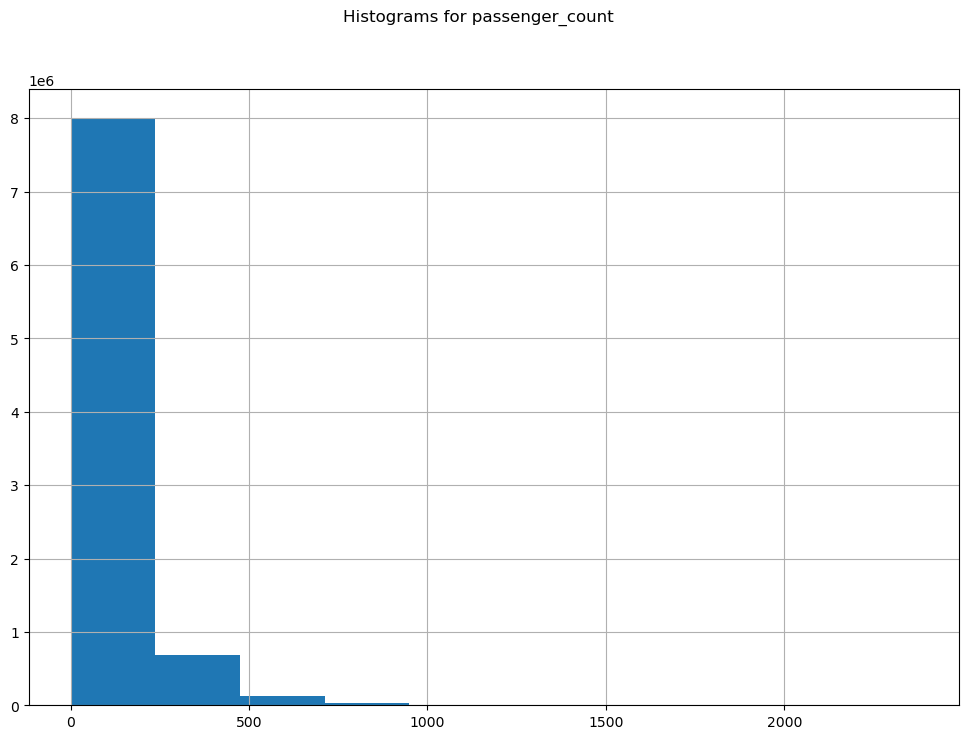

In [33]:
# Plot histograms for continuous features

combined_df['passenger_count'].hist(figsize=(12, 8))
plt.suptitle('Histograms for passenger_count')
plt.show()

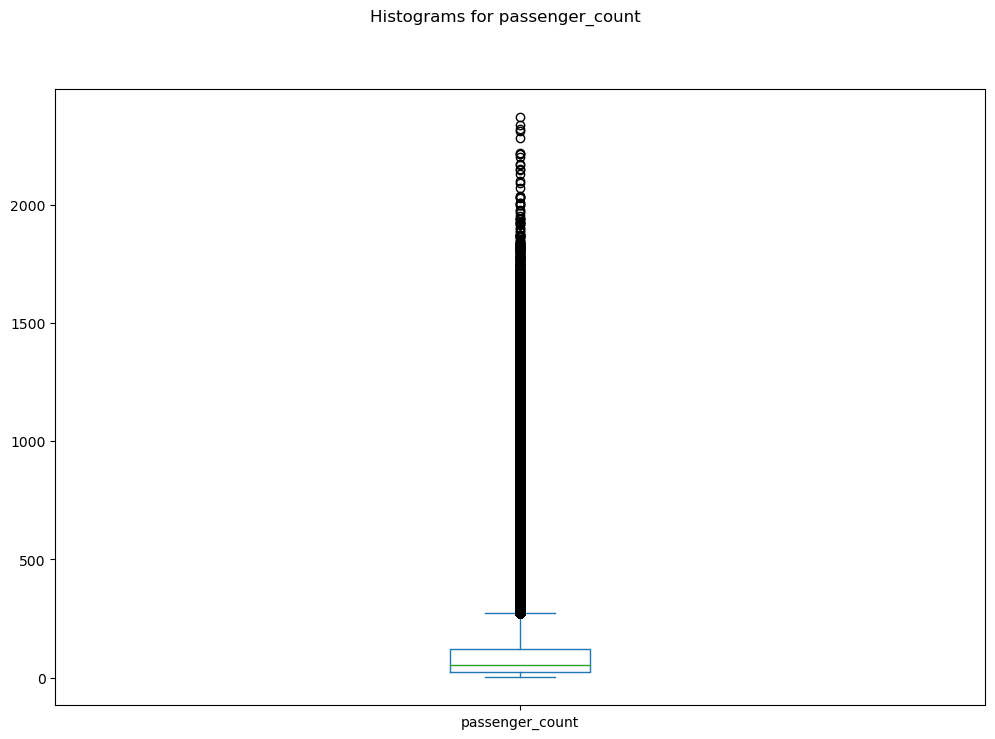

In [34]:
combined_df[cont_features].plot(kind='box', figsize=(12, 8))

plt.suptitle('Histograms for passenger_count')
plt.show()

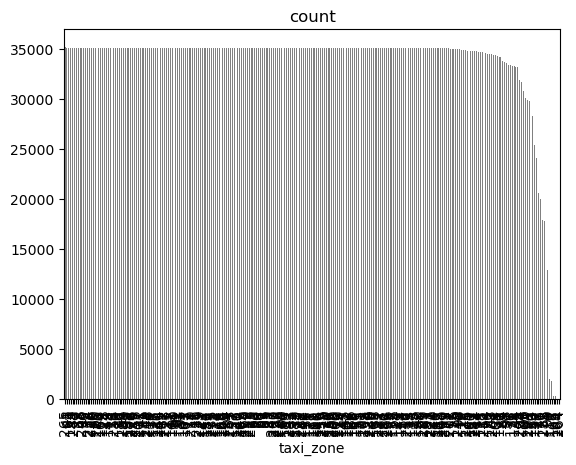

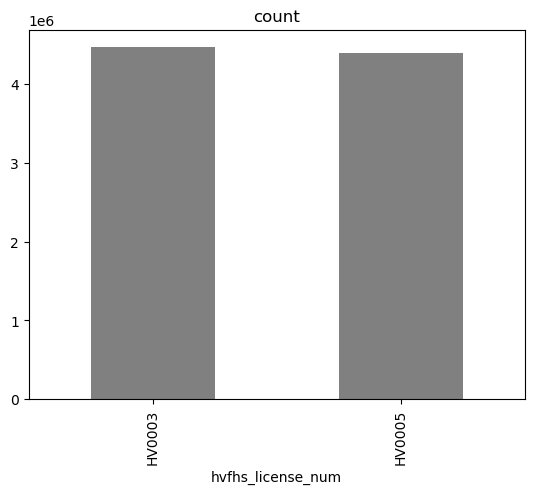

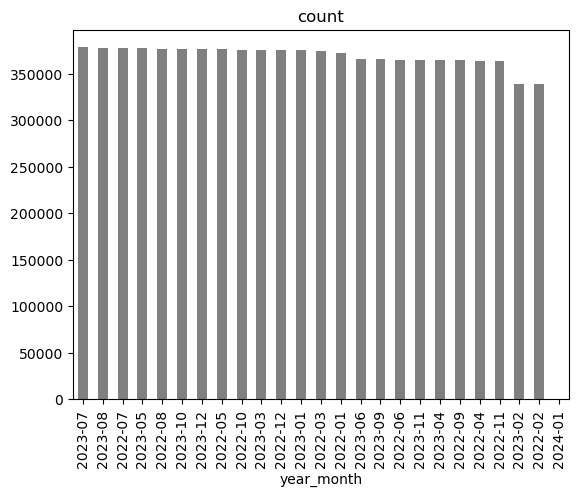

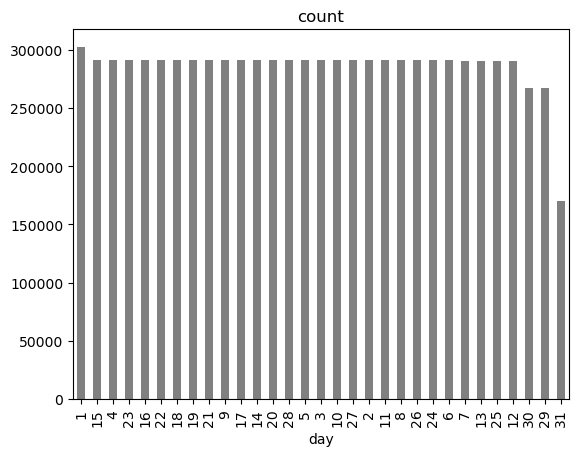

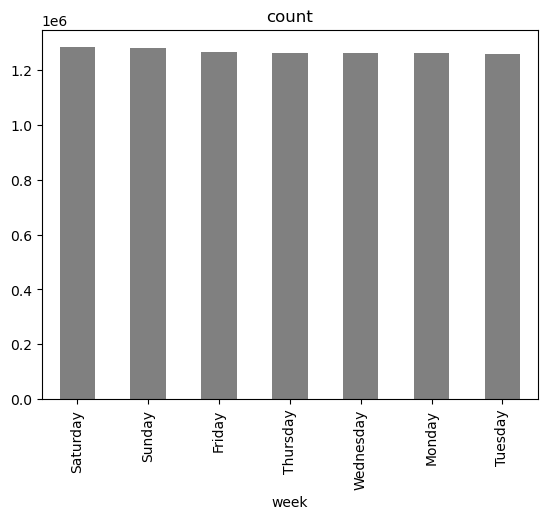

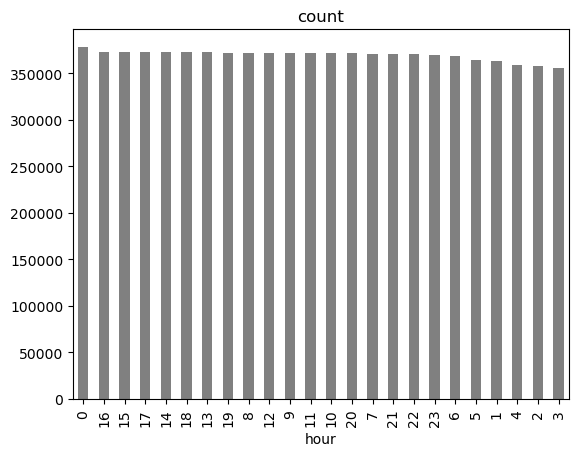

In [37]:
# Plot bar plots for categorical features
categorical_features = combined_df.select_dtypes(include='category').columns
for col in categorical_features:
    plt.figure()
    combined_df[col].value_counts(dropna=False).plot(kind='bar',subplots=True, figsize=(10,3), sharex=False, sharey=False, color = 'grey')
    plt.show()

In [41]:
combined_df.reset_index(drop=True).to_parquet("basic_hvfh_cleaned_df.parquet", index=False)

In [42]:
combined_df

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2
...,...,...,...,...,...,...,...,...
8863025,265,2023-12-31 23:00:00,HV0005,418.0,2023-12,31,Sunday,23
8863026,265,2024-01-01 00:00:00,HV0003,276.0,2024-01,1,Monday,0
8863027,265,2024-01-01 00:00:00,HV0005,156.0,2024-01,1,Monday,0
8863028,265,2024-01-01 01:00:00,HV0003,8.0,2024-01,1,Monday,1


In [2]:
df = pd.read_parquet("basic_hvfh_cleaned_df.parquet")
df

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2
...,...,...,...,...,...,...,...,...
8862920,265,2023-12-31 23:00:00,HV0005,418.0,2023-12,31,Sunday,23
8862921,265,2024-01-01 00:00:00,HV0003,276.0,2024-01,1,Monday,0
8862922,265,2024-01-01 00:00:00,HV0005,156.0,2024-01,1,Monday,0
8862923,265,2024-01-01 01:00:00,HV0003,8.0,2024-01,1,Monday,1


In [4]:
print(df.dtypes)

taxi_zone                     int64
datetime             datetime64[ns]
hvfhs_license_num          category
passenger_count             float64
year_month                period[M]
day                           int32
week                         object
hour                          int32
dtype: object


In [6]:
object_columns = df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')   


df["day"] = df["day"].astype('category') 
df["hour"] = df["hour"].astype('category') 
df["year_month"] = df["year_month"].astype('category') 


print(df.dtypes)
df

taxi_zone                     int64
datetime             datetime64[ns]
hvfhs_license_num          category
passenger_count             float64
year_month                 category
day                        category
week                       category
hour                       category
dtype: object


,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2
...,...,...,...,...,...,...,...,...
8862920,265,2023-12-31 23:00:00,HV0005,418.0,2023-12,31,Sunday,23
8862921,265,2024-01-01 00:00:00,HV0003,276.0,2024-01,1,Monday,0
8862922,265,2024-01-01 00:00:00,HV0005,156.0,2024-01,1,Monday,0
8862923,265,2024-01-01 01:00:00,HV0003,8.0,2024-01,1,Monday,1


In [7]:
# Define the list of months in your range
month_list = ["2023-12", "2023-11", "2023-10", "2023-09", "2023-08", "2023-07", "2023-06", "2023-05", "2023-04", "2023-03", "2023-02", "2023-01",
              "2022-12", "2022-11", "2022-10", "2022-09", "2022-08", "2022-07", "2022-06", "2022-05", "2022-04", "2022-03", "2022-02", "2022-01"]

# Check for rows with months not in the specified range
out_range_month = df[~df['year_month'].isin(month_list)]

# Display the rows with months not in the specified range
out_range_month

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour
8487469,1,2024-01-01 00:00:00,HV0003,3.0,2024-01,1,Monday,0
8487470,1,2024-01-01 00:00:00,HV0005,1.0,2024-01,1,Monday,0
8488998,3,2024-01-01 00:00:00,HV0003,7.0,2024-01,1,Monday,0
8490487,4,2024-01-01 00:00:00,HV0003,14.0,2024-01,1,Monday,0
8490488,4,2024-01-01 00:00:00,HV0005,2.0,2024-01,1,Monday,0
...,...,...,...,...,...,...,...,...
8861432,263,2024-01-01 00:00:00,HV0005,14.0,2024-01,1,Monday,0
8862921,265,2024-01-01 00:00:00,HV0003,276.0,2024-01,1,Monday,0
8862922,265,2024-01-01 00:00:00,HV0005,156.0,2024-01,1,Monday,0
8862923,265,2024-01-01 01:00:00,HV0003,8.0,2024-01,1,Monday,1


In [8]:
# Drop miss match value rows.
df = df.drop(out_range_month.index)

In [9]:
df

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2
...,...,...,...,...,...,...,...,...
8862916,265,2023-12-31 21:00:00,HV0005,473.0,2023-12,31,Sunday,21
8862917,265,2023-12-31 22:00:00,HV0003,977.0,2023-12,31,Sunday,22
8862918,265,2023-12-31 22:00:00,HV0005,439.0,2023-12,31,Sunday,22
8862919,265,2023-12-31 23:00:00,HV0003,997.0,2023-12,31,Sunday,23


In [10]:
# Dictionary mapping HVFHS license numbers to company names
company_mapping = {
    'HV0002': 'Juno',
    'HV0003': 'Uber',
    'HV0004': 'Via',
    'HV0005': 'Lyft'
}

# Map the hvfhs_license_num to the company names using the dictionary
df['company'] = df['hvfhs_license_num'].map(company_mapping)

In [17]:
df.head()

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour,company
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0,Uber
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1,Uber
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1,Lyft
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2,Uber
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2,Lyft


In [19]:
df.dtypes

taxi_zone                     int64
datetime             datetime64[ns]
hvfhs_license_num          category
passenger_count             float64
year_month                 category
day                        category
week                       category
hour                       category
company                    category
dtype: object

In [20]:
# Convert the 'year_month' column to string
df['year_month'] = df['year_month'].astype(str)

In [22]:
df.reset_index(drop=True).to_parquet("basic_hvfh_df_cleaned_060624.parquet", index=False)

In [24]:
df = pd.read_parquet("basic_hvfh_df_cleaned_060624.parquet")
df

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour,company
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0,Uber
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1,Uber
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1,Lyft
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2,Uber
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2,Lyft
...,...,...,...,...,...,...,...,...,...
8862431,265,2023-12-31 21:00:00,HV0005,473.0,2023-12,31,Sunday,21,Lyft
8862432,265,2023-12-31 22:00:00,HV0003,977.0,2023-12,31,Sunday,22,Uber
8862433,265,2023-12-31 22:00:00,HV0005,439.0,2023-12,31,Sunday,22,Lyft
8862434,265,2023-12-31 23:00:00,HV0003,997.0,2023-12,31,Sunday,23,Uber


In [25]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Read the geojson file
geo_taxi_zone = gpd.read_file('../../datasets/raw/taxi_raw/NYC_Taxi_Zones.geojson')
geo_taxi_zone

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."
...,...,...,...,...,...,...,...
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ..."


<AxesSubplot:>

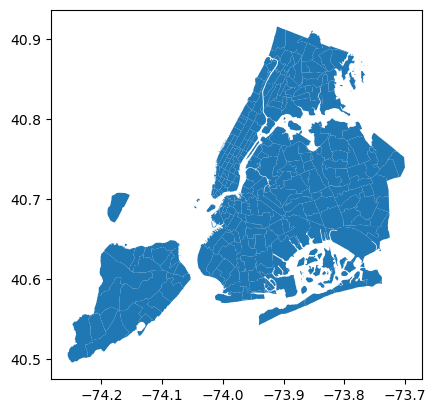

In [26]:
# Plot the GeoDataFrame
geo_taxi_zone.plot()

In [27]:
# Convert to int
df['taxi_zone'] = df['taxi_zone'].astype(int)
geo_taxi_zone['objectid'] = geo_taxi_zone['objectid'].astype(int)

# Values in A but not in B
diff_A_B = set(df['taxi_zone']).difference(set(geo_taxi_zone['objectid']))
print("In TLC but not GEO:",diff_A_B)

# Values in B but not in A
diff_B_A = set(geo_taxi_zone['objectid']).difference(set(df['taxi_zone']))
print("In GEO but not TLC:",diff_B_A)

In TLC but not GEO: {264, 265}
In GEO but not TLC: {103}


In [32]:
# must drop 264 and 265 zones
df = df.loc[(df['taxi_zone'] != 264) & (df['taxi_zone'] != 265)]

In [34]:
# check again
diff_A_B = set(df['taxi_zone']).difference(set(geo_taxi_zone['objectid']))
print(diff_A_B)

set()


In [35]:
df = df.merge(geo_taxi_zone[['objectid', 'borough']], 
                               left_on='taxi_zone', 
                               right_on='objectid', 
                               how='left')

# Now, drop the 'objectid' column if it's not needed
df.drop('objectid', axis=1, inplace=True)

In [36]:
df

,taxi_zone,datetime,hvfhs_license_num,passenger_count,year_month,day,week,hour,company,borough
0,1,2022-01-01 00:00:00,HV0003,1.0,2022-01,1,Saturday,0,Uber,EWR
1,1,2022-01-01 01:00:00,HV0003,4.0,2022-01,1,Saturday,1,Uber,EWR
2,1,2022-01-01 01:00:00,HV0005,2.0,2022-01,1,Saturday,1,Lyft,EWR
3,1,2022-01-01 02:00:00,HV0003,13.0,2022-01,1,Saturday,2,Uber,EWR
4,1,2022-01-01 02:00:00,HV0005,4.0,2022-01,1,Saturday,2,Lyft,EWR
...,...,...,...,...,...,...,...,...,...,...
8827266,263,2023-12-31 21:00:00,HV0005,218.0,2023-12,31,Sunday,21,Lyft,Manhattan
8827267,263,2023-12-31 22:00:00,HV0003,387.0,2023-12,31,Sunday,22,Uber,Manhattan
8827268,263,2023-12-31 22:00:00,HV0005,178.0,2023-12,31,Sunday,22,Lyft,Manhattan
8827269,263,2023-12-31 23:00:00,HV0003,265.0,2023-12,31,Sunday,23,Uber,Manhattan


In [37]:
print("Borough Unique Values: ", df['borough'].unique().tolist(), "\n")

Borough Unique Values:  ['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn'] 



In [38]:
df.reset_index(drop=True).to_parquet("basic_taxi_df_cleaned_070624.parquet", index=False)